In [1]:
# importing libraries
import random            as rand                     # random number gen
import pandas            as pd                       # data science essential
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler

# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
 
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying the path and file name
file =  '~/Desktop/ml/Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
Chef_df = pd.read_excel(file)


# checking the file
Chef_df.head(n = 50)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.00,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.00,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.00,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.00,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.00,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205
5,1550.00,1,Genna Lannister,genna.lannister@protonmail.com,Genna,Lannister,36,2,9,1,190.18,1,4,0,1,4,1,0,0,3,1,0,78.8,1,1,3,12,0
6,1430.00,1,Olene Tyrell,olene.tyrell@mcdonalds.com,Olene,Tyrell,61,7,6,2,154.20,1,1,0,1,6,1,45,1,2,1,1,84.8,1,0,3,12,169
7,1321.25,1,Stevron Frey,stevron.frey@travelers.com,Stevron,Frey,13,1,12,3,228.73,1,0,0,1,6,1,13,0,0,0,0,63.0,1,0,1,15,0
8,1505.00,1,Praed,praed@nike.com,Praed,Praed,16,1,12,5,14.26,1,0,0,1,6,1,52,0,1,0,0,63.0,1,0,2,18,0
9,1493.00,0,Alysane Mormont,alysane.mormont@caterpillar.com,Alysane,Mormont,95,3,6,8,49.26,1,0,0,0,6,1,12,0,2,1,0,84.8,1,1,3,14,147


In [2]:
# STEP 1: personal emails split

# listing placeholder
placeholder_lst = []

# email address
for index, col in Chef_df.iterrows():
    
    # splitting email domain at '@'
    split_email = Chef_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame 
Email_dataset = pd.DataFrame(placeholder_lst)

In [3]:
# renaming column to concatenate
Email_dataset.columns = ['0' , 'Email_Domain']


# concatenating personal_email_domain with friends DataFrame
Chef_df = pd.concat([Chef_df, Email_dataset['Email_Domain']],
                     axis = 1)


# printing value counts of personal_email_domain
Chef_df.loc[: ,'Email_Domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
merck.com            28
cocacola.com         28
mcdonalds.com        28
apple.com            27
nike.com             27
ge.org               26
dupont.com           26
ibm.com              26
microsoft.com        25
chevron.com          25
travelers.com        24
exxon.com            24
unitedhealth.com     24
boeing.com           23
pg.com               22
verizon.com          22
caterpillar.com      22
mmm.com              22
walmart.com          21
disney.com           21
visa.com             20
pfizer.com           20
jpmorgan.com         19
goldmansacs.com      18
cisco.com            18
unitedtech.com       18
intel.com            17
homedepot.com        17
Name: Email_Domain, dtype: int64

In [4]:
#Setting up of Personal, Professional and Junk Emails
personal_email      = ['@gmail.com','@yahoo.com','@protonmail.com']

professional_email  = ['@mmm.com','@amex.com','@apple.com','@boeing.com',
                               '@caterpillar.com','@chevron.com','@cisco.com',
                               '@cocacola.com','@disney.com','@dupont.com',
                               '@exxon.com','@ge.org','@goldmansacs.com',
                               '@homedepot.com','@ibm.com','@intel.com',
                               '@jnj.com','@jpmorgan.com','@mcdonalds.com',
                               '@merck.com','@microsoft.com','@nike.com',
                               '@pfizer.com','@pg.com','@travelers.com',
                               '@unitedtech.com','@unitedhealth.com','@verizon.com',
                               '@visa.com','@walmart.com']

junk_email       = ['@me.com','@aol.com','@hotmail.com','@live.com',
                            '@msn.com','@passport.com']


# placeholder list
placeholder_lst = []


# looping group observations by domain type
for domain in Chef_df['Email_Domain']:
        if '@' + domain in personal_email:
            placeholder_lst.append(2)
            
        elif '@' + domain in professional_email:
            placeholder_lst.append(1)
           
        elif '@' + domain in junk_email:
            placeholder_lst.append(0)
            
        else:
            print('Unknown')


# concatenating with original DataFrame
Chef_df['Email_group'] = pd.Series(placeholder_lst)

# checking results
Chef_df['Email_group'].value_counts()

2    861
1    696
0    389
Name: Email_group, dtype: int64

In [5]:
# dropping categorical variables after being encoded
Chef_df = Chef_df.drop('Email_Domain', axis = 1)

In [6]:
# count of  number of zeroes

CBN_zeroes   = len(Chef_df['CANCELLATIONS_BEFORE_NOON'][Chef_df['CANCELLATIONS_BEFORE_NOON'] == 0])
CAN_zeroes   = len(Chef_df['CANCELLATIONS_AFTER_NOON'][Chef_df['CANCELLATIONS_AFTER_NOON'] == 0])
ML_zeroes   = len(Chef_df['MOBILE_LOGINS'][Chef_df['MOBILE_LOGINS'] == 0])
WP_zeroes   = len(Chef_df['WEEKLY_PLAN'][Chef_df['WEEKLY_PLAN'] == 0])
ED_zeroes   = len(Chef_df['EARLY_DELIVERIES'][Chef_df['EARLY_DELIVERIES'] == 0])
LD_zeroes   = len(Chef_df['LATE_DELIVERIES'][Chef_df['LATE_DELIVERIES'] == 0])
MCA_zeroes   = len(Chef_df['MASTER_CLASSES_ATTENDED'][Chef_df['MASTER_CLASSES_ATTENDED'] == 0])
TPV_zeroes   = len(Chef_df['TOTAL_PHOTOS_VIEWED'][Chef_df['TOTAL_PHOTOS_VIEWED'] == 0])





# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------

Cancellation_before_noon           | {CBN_zeroes}\t\t{len(Chef_df) - CBN_zeroes}
Cancellation_after_noon            | {CAN_zeroes}\t\t{len(Chef_df) - CAN_zeroes}
Mobile_logins                      | {ML_zeroes}\t\t{len(Chef_df) -   ML_zeroes}
Weekly_plan                        | {WP_zeroes}\t\t{len(Chef_df) -   WP_zeroes}
Early_deleveries                   | {ED_zeroes}\t\t{len(Chef_df) - ED_zeroes}
Late_Deliveries                    | {LD_zeroes}\t\t{len(Chef_df) - LD_zeroes}
Master_classes_attended            | {MCA_zeroes}\t\t{len(Chef_df) - MCA_zeroes}
Total_photos_viewed                | {TPV_zeroes}\t\t{len(Chef_df) - TPV_zeroes}

""")


                 No		Yes
               ---------------------

Cancellation_before_noon           | 667		1279
Cancellation_after_noon            | 1667		279
Mobile_logins                      | 16		1930
Weekly_plan                        | 468		1478
Early_deleveries                   | 1167		779
Late_Deliveries                    | 319		1627
Master_classes_attended            | 932		1014
Total_photos_viewed                | 1140		806




In [7]:
# dummy variable for basement.
Chef_df['has_Cancellation_before_noon']   = 0
Chef_df['has_Cancellation_after_noon'] = 0
Chef_df['has_Weekly_plan']    = 0
Chef_df['has_Early_deleveries']      = 0
Chef_df['has_Late_Deliveries']      = 0
Chef_df['has_Master_classes_attended']      = 0
Chef_df['has_Total_photos_viewed']      = 0

for index, value in Chef_df.iterrows():
    
    
    if Chef_df.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        Chef_df.loc[index, 'has_Cancellation_before_noon'] = 1


    
    if Chef_df.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        Chef_df.loc[index, 'has_Cancellation_after_noon'] = 1
        
        
  
    if Chef_df.loc[index, 'WEEKLY_PLAN'] > 0:
        Chef_df.loc[index, 'has_Weekly_plan'] = 1
        
        

    if Chef_df.loc[index, 'LATE_DELIVERIES'] > 0:
        Chef_df.loc[index, 'has_Late_Deliveries'] = 1
        
        

    if Chef_df.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        Chef_df.loc[index, 'has_Master_classes_attended'] = 1
    
    
    if Chef_df.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        Chef_df.loc[index, 'has_Total_photos_viewed'] = 1


Chef_df[['has_Cancellation_before_noon', 'has_Cancellation_after_noon', 'has_Weekly_plan', 
      'has_Late_Deliveries', 'has_Master_classes_attended','has_Total_photos_viewed']].head()

,has_Cancellation_before_noon,has_Cancellation_after_noon,has_Weekly_plan,has_Late_Deliveries,has_Master_classes_attended,has_Total_photos_viewed
0,1,1,0,1,0,0
1,0,0,1,1,0,1
2,1,0,1,1,0,0
3,1,0,1,1,0,0
4,0,0,1,1,1,1


In [8]:
Chef_df['Revenue_per_order'] = Chef_df['REVENUE'] / Chef_df['TOTAL_MEALS_ORDERED']
Chef_df.loc[: , "frequency_of_unique_orders"] = (Chef_df.loc[:,"TOTAL_MEALS_ORDERED"]/
                                                   Chef_df.loc[:,"UNIQUE_MEALS_PURCH"]).round(2)


## Ratio of customer care contact with number of orders
Chef_df.loc[ : , "complaint_management"] = (Chef_df.loc[:,"CONTACTS_W_CUSTOMER_SERVICE"]/
                                              Chef_df.loc[:,"TOTAL_MEALS_ORDERED"]).round(2)

Chef_df['total_unique_orders'] =  Chef_df.UNIQUE_MEALS_PURCH / Chef_df.TOTAL_MEALS_ORDERED # Total Unique orders

Chef_df.describe(include = 'number').round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,Email_group,has_Cancellation_before_noon,has_Cancellation_after_noon,has_Weekly_plan,has_Early_deleveries,has_Late_Deliveries,has_Master_classes_attended,has_Total_photos_viewed,Revenue_per_order,frequency_of_unique_orders,complaint_management,total_unique_orders
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43,1.24,0.66,0.14,0.76,0.0,0.84,0.52,0.41,36.50,20.52,0.18,0.11
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01,0.76,0.47,0.35,0.43,0.0,0.37,0.50,0.49,19.36,19.06,0.24,0.12
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,9.78,1.33,0.01,0.01
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00,1.00,0.00,0.00,1.00,0.0,1.00,0.00,0.00,22.16,7.33,0.07,0.04
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00,1.00,1.00,0.00,1.00,0.0,1.00,1.00,0.00,33.56,15.33,0.10,0.07
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00,2.00,1.00,0.00,1.00,0.0,1.00,1.00,1.00,45.00,26.25,0.15,0.14
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00,2.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,153.12,160.00,1.00,0.75


In [9]:
def text_split_feature(col, df, sep=' ', new_col_name='Total_Names'):
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [10]:
text_split_feature(col = 'NAME',
                   df  = Chef_df)


# checking results
Chef_df['Total_Names'].value_counts().sort_index()


1     591
2    1201
3      98
4       9
5      35
6      12
Name: Total_Names, dtype: int64

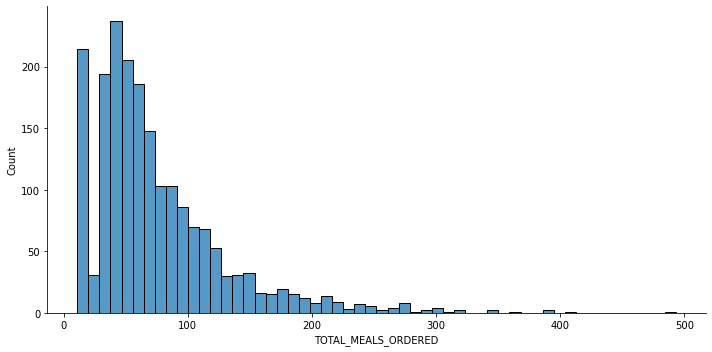

In [11]:
# display of the plot for 'Mas Vnr Area'
sns.displot(x = 'TOTAL_MEALS_ORDERED',
            data = Chef_df,
            height = 5,
            aspect = 2)


# title and labels
plt.title('')

# displaying the plot
plt.show()

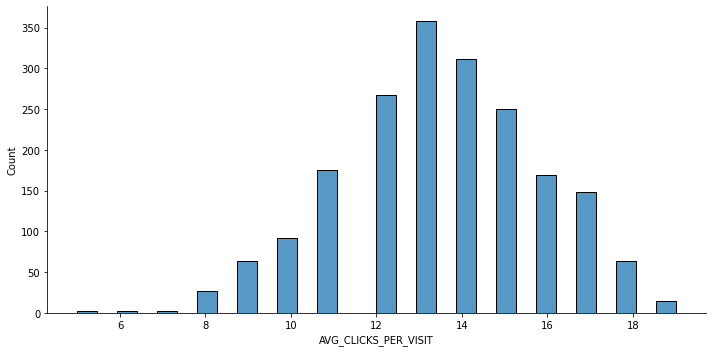

In [12]:
# display of the plot for 'Mas Vnr Area'
sns.displot(x = 'AVG_CLICKS_PER_VISIT',
            data = Chef_df,
            height = 5,
            aspect = 2)


# title and labels
plt.title('')

# displaying the plot
plt.show()

In [13]:
Chef_df['log_REVENUE'] = np.log(Chef_df['REVENUE']).round(2)
Chef_df['log_TOTAL_MEALS_ORDERED'] = np.log(Chef_df['TOTAL_MEALS_ORDERED']).round(2)
Chef_df['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log(Chef_df['CONTACTS_W_CUSTOMER_SERVICE']).round(2)
Chef_df['log_AVG_TIME_PER_SITE_VISIT'] = np.log(Chef_df['AVG_TIME_PER_SITE_VISIT']).round(2)
Chef_df['log_AVG_CLICKS_PER_VISIT'] = np.log(Chef_df['AVG_CLICKS_PER_VISIT']).round(2)
Chef_df['log_AVG_PREP_VID_TIME'] = np.log(Chef_df['AVG_PREP_VID_TIME']).round(2)

In [14]:
Chef_df['Business_Success']   = 0

for index, value in Chef_df.iterrows():
    
    
    if Chef_df.loc[index, 'AVG_PREP_VID_TIME'] >= 0 and Chef_df.loc[index, 'AVG_PREP_VID_TIME'] <= 50  :
        Chef_df.loc[index, 'Business_Success'] = 1
        
    if Chef_df.loc[index, 'AVG_PREP_VID_TIME'] >= 51 and Chef_df.loc[index, 'AVG_PREP_VID_TIME'] <= 100  :
        Chef_df.loc[index, 'Business_Success'] = 2

    if Chef_df.loc[index, 'AVG_PREP_VID_TIME'] >= 101 and Chef_df.loc[index, 'AVG_PREP_VID_TIME'] <= 150 :
        Chef_df.loc[index, 'Business_Success'] = 3
    
    if Chef_df.loc[index, 'AVG_PREP_VID_TIME'] >= 151 and Chef_df.loc[index, 'AVG_PREP_VID_TIME'] <= 200  :
        Chef_df.loc[index, 'Business_Success'] = 3
        
    if Chef_df.loc[index, 'AVG_PREP_VID_TIME'] >= 201 and Chef_df.loc[index, 'AVG_PREP_VID_TIME'] <= 250  :
        Chef_df.loc[index, 'Business_Success'] = 4
        
    if Chef_df.loc[index, 'AVG_PREP_VID_TIME'] >= 251 and Chef_df.loc[index, 'AVG_PREP_VID_TIME'] <= 300  :
        Chef_df.loc[index, 'Business_Success'] = 5
        
    if Chef_df.loc[index, 'AVG_PREP_VID_TIME'] >= 301:
        Chef_df.loc[index, 'Business_Success'] = 6

In [15]:
df_corr = Chef_df.corr().round(2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS                 1.00
Email_group                        0.17
CANCELLATIONS_BEFORE_NOON          0.16
Total_Names                        0.16
has_Cancellation_before_noon       0.14
MOBILE_NUMBER                      0.10
TASTES_AND_PREFERENCES             0.08
REFRIGERATED_LOCKER                0.07
log_CONTACTS_W_CUSTOMER_SERVICE    0.05
has_Master_classes_attended        0.05
CONTACTS_W_CUSTOMER_SERVICE        0.04
PC_LOGINS                          0.04
PACKAGE_LOCKER                     0.04
MASTER_CLASSES_ATTENDED            0.04
AVG_PREP_VID_TIME                  0.03
log_AVG_PREP_VID_TIME              0.03
Business_Success                   0.03
MEDIAN_MEAL_RATING                 0.03
log_AVG_TIME_PER_SITE_VISIT        0.02
LARGEST_ORDER_SIZE                 0.02
log_TOTAL_MEALS_ORDERED            0.02
EARLY_DELIVERIES                   0.02
TOTAL_PHOTOS_VIEWED                0.01
AVG_TIME_PER_SITE_VISIT            0.01
has_Total_photos_viewed            0.01


In [16]:
Chef_df.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'Email_group', 'has_Cancellation_before_noon', 'has_Cancellation_after_noon', 'has_Weekly_plan', 'has_Early_deleveries', 'has_Late_Deliveries', 'has_Master_classes_attended', 'has_Total_photos_viewed', 'Revenue_per_order', 'frequency_of_unique_orders', 'complaint_management', 'total_unique_orders', 'Total_Names', 'log_REVENUE', 'log_TOTAL_MEALS_ORDERED', 'log_CONTACTS_W_CUSTOMER_SERVICE',
       'log_AVG_TIME_PER_S

In [17]:
##
# optimal_neighbors
##############################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set and test set accuracy 
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building esponse variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


###############
# visual_cm
###############
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [18]:
# declare of  explanatory variables
Chef_df_data = Chef_df.drop('CROSS_SELL_SUCCESS', axis = 1)


# declare of response variable
Chef_df_target = Chef_df.loc[ : , 'CROSS_SELL_SUCCESS']

In [19]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            Chef_df_data,
            Chef_df_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = Chef_df_target)


# merging training data for statsmodels
Chef_df_train = pd.concat([X_train, y_train], axis = 1)

In [20]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



In [21]:
for val in Chef_df_data:
    print(f" {val} + ")

 REVENUE + 
 NAME + 
 EMAIL + 
 FIRST_NAME + 
 FAMILY_NAME + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 Email_group + 
 has_Cancellation_before_noon + 
 has_Cancellation_after_noon + 
 has_Weekly_plan + 
 has_Early_deleveries + 
 has_Late_Deliveries + 
 has_Master_classes_attended + 
 has_Total_photos_viewed + 
 Revenue_per_order + 
 frequency_of_unique_orders + 
 complaint_management + 
 total_unique_orders + 
 Total_Names + 
 log_REVENUE + 
 log_TOTAL_MEALS_ORDERED + 
 log_CONTACTS_W_CUSTOMER_SERVICE + 
 log_AVG_TIM

In [22]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """  CROSS_SELL_SUCCESS ~
                                         REVENUE +  
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 Email_group +  
 Revenue_per_order + 
 frequency_of_unique_orders + 
 complaint_management + 
 total_unique_orders + 
 Total_Names + 
 log_REVENUE + 
 Business_Success  """,
                                         data    = Chef_df_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.565409
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1427
Method:                           MLE   Df Model:                           31
Date:                Tue, 26 Jan 2021   Pseudo R-squ.:                 0.09961
Time:                        23:37:37   Log-Likelihood:                -824.93
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 2.182e-23
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -5.7100      4.274     -1.336      0.182     -14.087       2.667
REVENUE                        -0.0002      0.000     -1.002      0.316      -0.001       0.000
TOTAL_MEALS_ORDERED            -0.0049      0.003     -1.762      0.078      -0.010       0.001
UNIQUE_MEALS_PURCH              0.0392      0.058      0.679      0.497      -0.074       0.152
CONTACTS_W_CUSTOMER_SERVICE     0.0709      0.060      1.177      0.239      -0.047       0.189
PRODUCT_CATEGORIES_VIEWED      -0.0106      0.020     -0.533      0.594      -0.050       0.028
AVG_TIME_PER_SITE_VISIT         0.0002      0.001      0.148      0.882      -0.002       0.002
MOBILE_NUMBER                   0.7665      0.174      4.414      0.000       0.426       1.107
CANCELLATIONS_BEFORE_NOON       0.2660      0.046      5.752      0.000       0.175       0.357
CANCELLATIONS_AFTER_NOON       -0.2401      0.138     -1.743      0.081      -0.510       0.030
TASTES_AND_PREFERENCES          0.3276      0.132      2.474      0.013       0.068       0.587
PC_LOGINS                       0.2101      0.104      2.013      0.044       0.006       0.415
MOBILE_LOGINS                  -0.1236      0.114     -1.080      0.280      -0.348       0.101
WEEKLY_PLAN                     0.0046      0.005      1.012      0.311      -0.004       0.014
EARLY_DELIVERIES                0.0606      0.027      2.269      0.023       0.008       0.113
LATE_DELIVERIES                 0.0155      0.022      0.701      0.483      -0.028       0.059
PACKAGE_LOCKER                  0.0755      0.144      0.524      0.600      -0.207       0.358
REFRIGERATED_LOCKER             0.3832      0.231      1.658      0.097      -0.070       0.836
AVG_PREP_VID_TIME               0.0021      0.003      0.712      0.476      -0.004       0.008
LARGEST_ORDER_SIZE             -0.0403      0.068     -0.593      0.553      -0.173       0.093
MASTER_CLASSES_ATTENDED         0.1418      0.114      1.244      0.214      -0.082       0.365
MEDIAN_MEAL_RATING              0.0925      0.168      0.550      0.582      -0.237       0.422
AVG_CLICKS_PER_VISIT           -0.0276      0.050     -0.554      0.580      -0.125       0.070
TOTAL_PHOTOS_VIEWED            -0.0002      0.000     -0.573      0.567      -0.001       0.001
Email_group                     0.5263      0.079      6.624      0.000       0.371       0.682
Revenue_per_order              -0.0127      0.009     -1.352      0.176      -0.031       0.006
frequency_of_unique_orders      0.0048      0.007      0.702      0.483      -0.009       0.018
complaint_management            0.8139      1.242      0.656      0.512      -1.620       3.247
total_unique_orders            -1.5555      1.357     -1.147      0.252      -4.215       1.104
Total_Names                     0.4982      0.092      5.434      0.000       0.319       0.678
log_REVENUE                     0.3531      0.629      0.561      0.575  

In [23]:
logit_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                     
                                     MOBILE_NUMBER +
                                     CANCELLATIONS_BEFORE_NOON +
                                     TASTES_AND_PREFERENCES+
                                     PC_LOGINS +
                                     EARLY_DELIVERIES +
                                     has_Master_classes_attended+
                                     
                                     REFRIGERATED_LOCKER+
                                     Email_group + 
                                     Total_Names 
                                     """,
                                     data    = Chef_df_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full.summary()

Optimization terminated successfully.
         Current function value: 0.572381
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1449
Method:                           MLE   Df Model:                            9
Date:                Tue, 26 Jan 2021   Pseudo R-squ.:                 0.08851
Time:                        23:37:38   Log-Likelihood:                -835.10
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 2.617e-30
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.3462      0.637     -5.252      0.000      -4.595      -2.097
MOBILE_NUMBER                   0.7525      0.170      4.420      0.000       0.419       1.086
CANCELLATIONS_BEFORE_NOON       0.2615      0.046      5.733      0.000       0.172       0.351
TASTES_AND_PREFERENCES          0.3410      0.130      2.621      0.009       0.086       0.596
PC_LOGINS                       0.1985      0.103      1.932      0.053      -0.003       0.400
EARLY_DELIVERIES                0.0573      0.026      2.171      0.030       0.006       0.109
has_Master_classes_attended     0.3140      0.119      2.642      0.008       0.081       0.547
REFRIGERATED_LOCKER             0.4501      0.202      2.225      0.026       0.054       0.847
Email_group                     0.5243      0.078      6.727      0.000       0.372       0.677
Total_Names                     0.4867      0.090      5.392      0.000       0.310       0.664
===============================================================================================
"""

In [24]:
candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
                   'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
                   'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
                   'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
                   'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
                   'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE',
                   'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT',
                   'TOTAL_PHOTOS_VIEWED', 'Email_group', 'has_Cancellation_before_noon',
                   'has_Cancellation_after_noon', 'has_Weekly_plan', 'has_Early_deleveries',
                   'has_Late_Deliveries', 'has_Master_classes_attended', 'has_Total_photos_viewed',
                   'Revenue_per_order', 'frequency_of_unique_orders', 'complaint_management',
                   'total_unique_orders', 'Total_Names', 'log_REVENUE', 'log_TOTAL_MEALS_ORDERED',
                   'log_CONTACTS_W_CUSTOMER_SERVICE','log_AVG_TIME_PER_SITE_VISIT',
                   'log_AVG_CLICKS_PER_VISIT', 'log_AVG_PREP_VID_TIME', 'Business_Success'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['MOBILE_NUMBER' , 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES',
                   'EARLY_DELIVERIES','REFRIGERATED_LOCKER','Email_group','Total_Names',
                    'has_Master_classes_attended'],
    
    

}

In [25]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'Email_group', 'has_Cancellation_before_noon', 'has_Cancellation_after_noon', 'has_Weekly_plan', 'has_Early_deleveries', 'has_Late_Deliveries', 'has_Master_classes_attended', 'has_Total_photos_viewed', 'Revenue_per_order', 'frequency_of_unique_orders', 'complaint_management', 'total_unique_orders', 'Total_Name

In [26]:
# train/test split with the full model
Chef_df_data   =  Chef_df.loc[ : , candidate_dict['logit_sig']]
Chef_df_target =  Chef_df.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            Chef_df_data,
            Chef_df_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = Chef_df_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(X_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(X_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7286
LogReg Testing  ACCURACY: 0.7228
LogReg Train-Test Gap   : 0.0058


In [27]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 38
False Positives: 118
False Negatives: 17
True Positives : 314



In [28]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.5961


In [29]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [30]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(X_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(X_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(X_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(X_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8711
Full Tree Testing ACCURACY : 0.6982
Full Tree AUC Score: 0.6593


In [31]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 86
False Positives: 70
False Negatives: 77
True Positives : 254



In [32]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(X_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(X_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(X_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7512
Testing  ACCURACY: 0.7803
AUC Score        : 0.713


In [33]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 82
False Positives: 74
False Negatives: 33
True Positives : 298



<ipython-input-29-0189e25a38e3>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


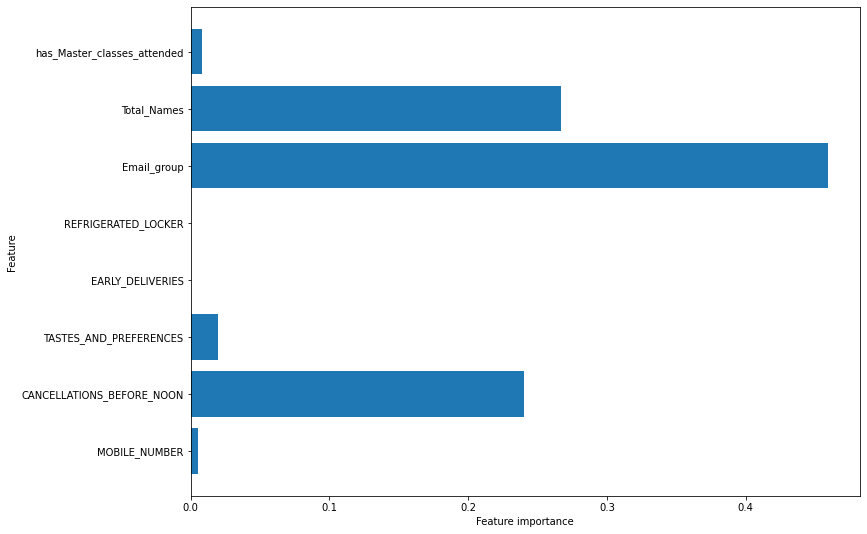

In [34]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = X_train,
                         export = False)

In [35]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)



Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.5961         (38, 118, 17, 314)
Full Tree     0.6593         (86, 70, 77, 254)
Pruned Tree   0.713         (82, 74, 33, 298)



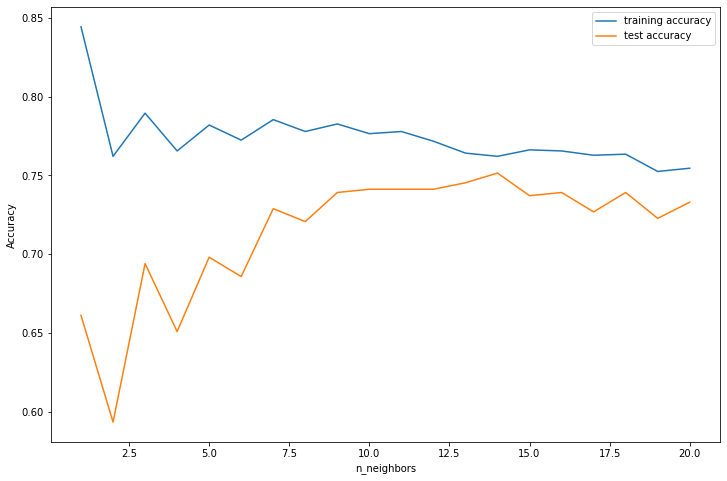

The optimal number of neighbors is: 14


In [36]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data        = Chef_df_data,
                                  y_data        = Chef_df_target,
                                  response_type = 'class')

In [ ]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(Chef_df_data, Chef_df_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

<ipython-input-37-bd4fbb78f31e>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
<ipython-input-37-bd4fbb78f31e>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


In [ ]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(X_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

In [ ]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")

In [ ]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(X_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(X_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

In [ ]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    

In [ ]:
# train/test split with the logit_sig variables
Chef_df_data   =  Chef_df.loc[ : , candidate_dict['logit_sig']]
Chef_df_target =  Chef_df.loc[ : , 'CROSS_SELL_SUCCESS']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            Chef_df_data,
            Chef_df_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = Chef_df_target)

In [ ]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [ ]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

In [ ]:
# plotting feature importances
plot_feature_importances(rf_default_fit,
                         train = x_train,
                         export = False)

In [ ]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")

In [ ]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest ',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

In [ ]:
The Tuned Tree model fits best looking at the AUC score of 0.7320